In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1) (2).zip


In [ ]:
import zipfile
import os

# Get the uploaded file name
uploaded_filename = list(uploaded.keys())[0]

# Extract contents of the ZIP file
extract_path = "/content/ev_data"
with zipfile.ZipFile(uploaded_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List files to see what's inside
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print("Found file:", os.path.join(root, file))


Found file: /content/ev_data/electric_vehicles_spec_2025.csv.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/ev_data/ev_data.csv")
df.head()


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [ ]:
# Check structure
df.info()

# Check for missing values
df.isnull().sum()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Fill missing numerical values with the mean
num_cols = ['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells',
            'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing battery type if needed
df['battery_type'].fillna('Unknown', inplace=True)

# Check again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

/tmp/ipython-input-37-981908689.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-37-981908689.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df.describe()


,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,919.362209,239.682853,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,216.000000,310.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,396.000000,437.500000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,485.293478,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


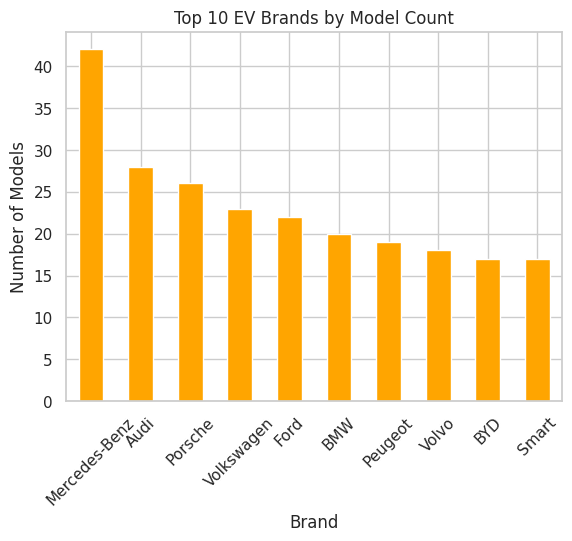

In [ ]:
df['brand'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 EV Brands by Model Count')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()


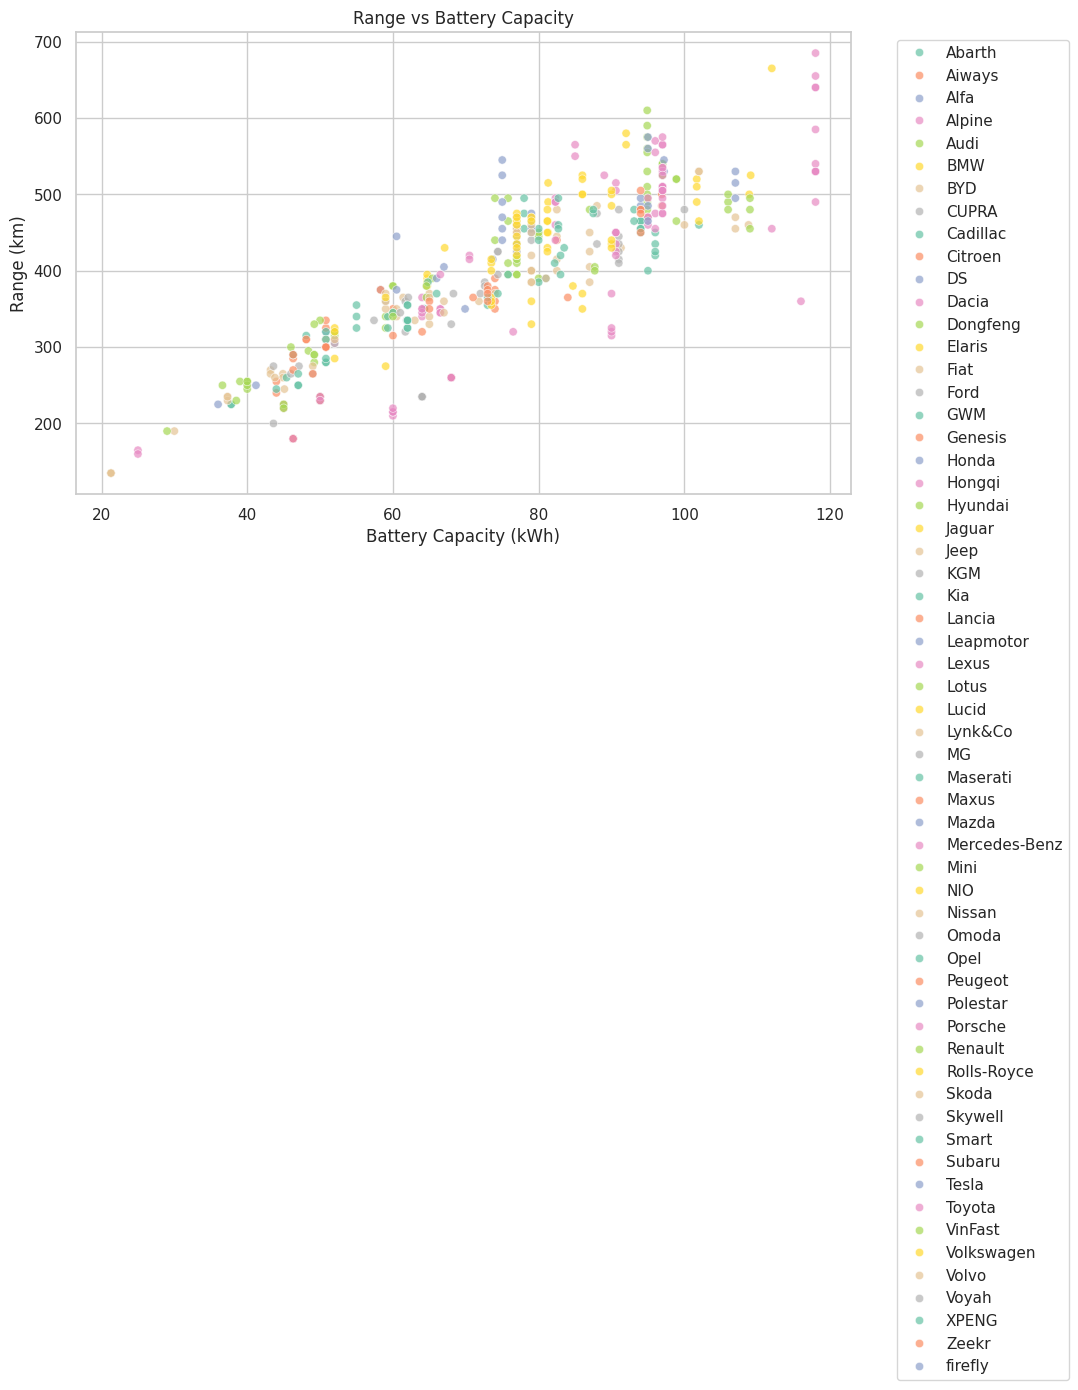

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='battery_capacity_kWh', y='range_km', hue='brand', palette='Set2', alpha=0.7)
plt.title('Range vs Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


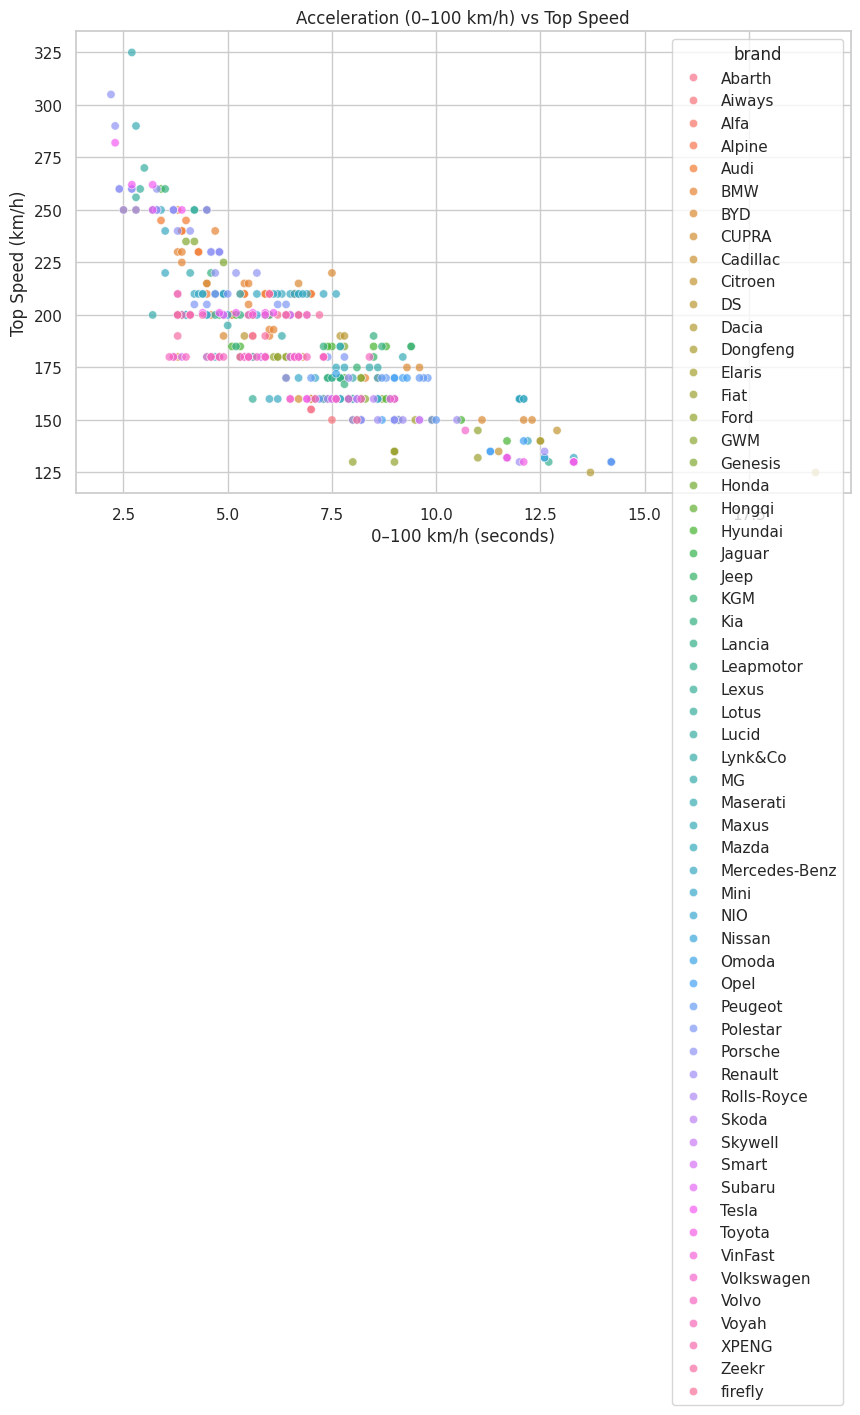

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acceleration_0_100_s', y='top_speed_kmh', hue='brand', alpha=0.7)
plt.title('Acceleration (0–100 km/h) vs Top Speed')
plt.xlabel('0–100 km/h (seconds)')
plt.ylabel('Top Speed (km/h)')
plt.show()


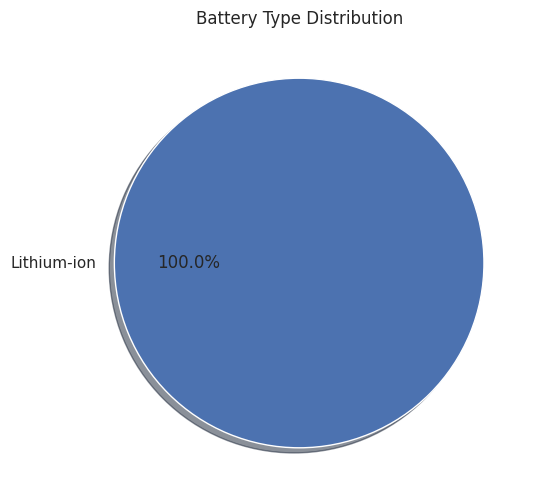

In [ ]:
df['battery_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), shadow=True)
plt.title('Battery Type Distribution')
plt.ylabel('')
plt.show()


In [ ]:
df.sort_values('efficiency_wh_per_km').head(5)[['brand', 'model', 'efficiency_wh_per_km', 'range_km']]


,brand,model,efficiency_wh_per_km,range_km
98,Dacia,Spring Electric 45,109,165
107,Fiat,500e Hatchback 24 kWh,112,135
103,Fiat,500e 3+1 24 kWh,112,135
105,Fiat,500e Cabrio 24 kWh,112,135
99,Dacia,Spring Electric 65,114,160


In [ ]:
df.groupby('brand')['range_km'].mean().sort_values(ascending=False).head(5)


,range_km
brand,
Lucid,603.333333
Porsche,502.884615
Tesla,490.000000
Lotus,489.166667
Voyah,480.000000


In [ ]:
df[df['range_km'] > 500][['brand', 'model', 'range_km']]


,brand,model,range_km
11,Audi,A6 Avant e-tron performance,575
12,Audi,A6 Avant e-tron quattro,560
14,Audi,A6 Sportback e-tron performance,610
15,Audi,A6 Sportback e-tron quattro,590
26,Audi,Q6 e-tron Sportback performance,510
...,...,...,...
436,Volkswagen,ID.7 Pro S,525
439,Volkswagen,ID.7 Tourer Pro S,520
445,Volvo,ES90 Twin Motor (MY26),530
446,Volvo,ES90 Twin Motor Performance (MY26),530


In [ ]:
df[df['acceleration_0_100_s'] < 4][['brand', 'model', 'acceleration_0_100_s']]


,brand,model,acceleration_0_100_s
30,Audi,S6 Avant e-tron,3.9
31,Audi,S6 Sportback e-tron,3.9
34,Audi,e-tron GT RS,2.8
35,Audi,e-tron GT RS performance,2.5
36,Audi,e-tron GT S,3.4
...,...,...,...
462,XPENG,G9 AWD Performance,3.9
469,Zeekr,001 Performance AWD,3.8
470,Zeekr,001 Privilege AWD,3.8
472,Zeekr,7X Performance AWD,3.8


In [ ]:
df[df['battery_type'].str.contains("Lithium", case=False)][['brand', 'model', 'battery_type']]


,brand,model,battery_type
0,Abarth,500e Convertible,Lithium-ion
1,Abarth,500e Hatchback,Lithium-ion
2,Abarth,600e Scorpionissima,Lithium-ion
3,Abarth,600e Turismo,Lithium-ion
4,Aiways,U5,Lithium-ion
...,...,...,...
473,Zeekr,7X Premium RWD,Lithium-ion
474,Zeekr,X Core RWD (MY25),Lithium-ion
475,Zeekr,X Long Range RWD (MY25),Lithium-ion
476,Zeekr,X Privilege AWD (MY25),Lithium-ion


In [ ]:
df.to_csv("cleaned_ev_data.csv", index=False)

from google.colab import files
files.download("cleaned_ev_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>